In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path='Objective_Function/objective_'

df_fixed_evs_diag = pd.read_csv(file_path+'Fixed_EVs_DIAG.csv')
df_fixed_pvs_diag = pd.read_csv(file_path+'Fixed_PVs_DIAG.csv')
df_mixed_diag =  pd.read_csv(file_path+'mixed_DIAG.csv')

In [3]:
df_all = [ df_mixed_diag , df_fixed_evs_diag, df_fixed_pvs_diag]
data_order=['Mixed','Fixed_EVs', 'Fixed_PVs']

In [4]:
DAs_dict = dict()
for i in range(10):
    DAs_dict[str(i)] = "DA"+str(i)

#Rename Columns
for df in df_all:
    df.rename(columns=DAs_dict, inplace=True)
    
# Drop First row
for df in df_all:
    df = df.iloc[1:]

In [5]:
def change_width(ax, new_value) :
    for patch in ax.patches :
        current_width = patch.get_width()
        diff = current_width - new_value

        # we change the bar width
        patch.set_width(new_value)

        # we recenter the bar
        patch.set_x(patch.get_x() + diff * .5)
        

# Comparing Algorithms results for three scenario in one place

C:\Users\alire\AppData\Local\Temp/ipykernel_11052/451556709.py:7: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for X in zip(df.mean().index, df.mean()):


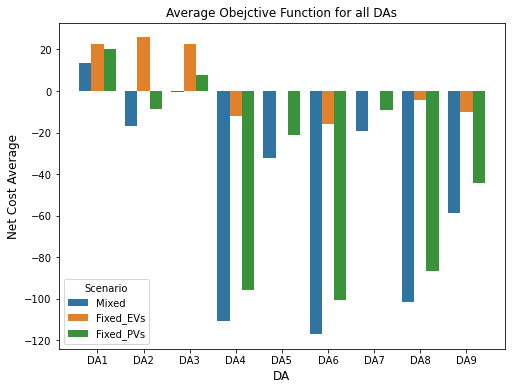

In [6]:
count=0
DA=[]
Scenario =[] 
Obj_Mean =[]

for df in df_all:
    for X in zip(df.mean().index, df.mean()):
        DA.append(X[0])
        Scenario.append(data_order[count])
        Obj_Mean.append(X[1])
    count+=1   
df_compare = pd.DataFrame({'Scenario':Scenario, 'DA':DA, 'Mean':Obj_Mean,})

#******************************************************************************
#***************** Plot Data **************************************************

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(data= df_compare, x='DA',y='Mean' ,hue='Scenario', ax=ax);

ax.set_title('Average Obejctive Function for all DAs', fontsize=12)
ax.set_xlabel('DA',fontsize=12);
ax.set_ylabel('Net Cost Average',fontsize=12);

ax.plot()

ax.set_rasterized(True)
fig.savefig("Figures_Objective/Average_objective_function_ALL_Scenarios.png", bbox_inches= 'tight', dpi=200)

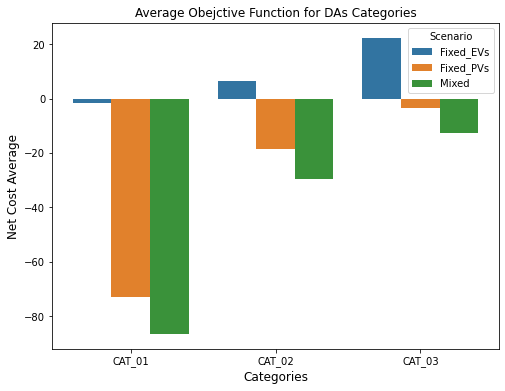

In [7]:
# Plot Based On Category
DAs_dict = dict()
for i in range(1,10):
    if i % 2 == 0:
        DAs_dict['DA'+str(i)] = 'CAT_01'
    elif i % 3 == 0:
        DAs_dict['DA'+str(i)] = 'CAT_02'
    else:
        DAs_dict['DA'+str(i)] = 'CAT_03'


for key, value in DAs_dict.items():
    df_compare.loc[df_compare['DA'] == key, 'DA'] = value

#****************************************
#********** Take Mean For Categories ****

df_compare = df_compare.groupby(['DA','Scenario']).mean().reset_index()


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(data= df_compare, x='DA',y='Mean' ,hue='Scenario', ax=ax);

ax.set_title('Average Obejctive Function for DAs Categories', fontsize=12)
ax.set_xlabel('Categories',fontsize=12);
ax.set_ylabel('Net Cost Average',fontsize=12);

ax.plot()

ax.set_rasterized(True)
fig.savefig("Figures_Objective/Average_objective_function_ALL_Categories.png", bbox_inches= 'tight', dpi=200)

In [8]:
df_fixed_pvs_diag

,DA1,DA2,DA3,DA4,DA5,DA6,DA7,DA8,DA9
0,74.763090,77.590297,77.426356,78.748238,78.375853,75.433947,77.717741,76.294717,77.418948
1,66.172580,55.059233,62.724447,55.767642,72.673654,51.334221,62.047868,63.313774,53.602394
2,56.271637,44.278272,51.825625,55.005387,63.667754,53.826484,58.972891,52.165490,58.145757
3,42.085351,15.818709,30.493082,-11.535656,33.148866,-10.145599,32.471056,-12.279681,17.620568
4,22.828221,-19.359582,2.904891,-81.943790,-18.161008,-89.589822,-6.205334,-78.955904,-44.444018
...,...,...,...,...,...,...,...,...,...
296,18.526585,-9.772373,1.187000,-99.101132,-21.382323,-108.641867,-11.374775,-91.767982,-45.191267
297,21.597727,-4.892967,8.575068,-104.166651,-26.107629,-106.483796,-8.175861,-91.152035,-45.017822
298,18.455631,-10.910168,1.074128,-99.153477,-21.267704,-105.607843,-11.346948,-91.268539,-47.992059
299,20.982683,-11.283959,11.099876,-102.585490,-24.922093,-101.672249,-9.160402,-91.500393,-45.201160


# Last N Iteration

In [2]:
# head_tail_slice = list(range(10))+list(range(-10,0))
# df_fixed_pvs_diag[['DA1', 'DA2', 'DA3']].iloc[head_tail_slice]

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

first_iter=20
x_range = [x for x in range(1,1+first_iter)]
X_range =[*x_range, *x_range, *x_range]
df_compare= df[['DA1', 'DA2', 'DA3']][:first_iter]
df_compare=df_compare.melt(var_name='DAs', value_name='Net Cost')
df_compare['Iteration'] = X_range
sns.lineplot(data=df_compare, x='Iteration', y='Net Cost', hue='DAs', ax=axes[0])
axes[0].set_xticks(range(1,first_iter+1));
axes[0].set_xlabel('Iteration Numbers',fontsize=12)
axes[0].title.set_text('(a) First %d Iterations'%first_iter)

ax =axes[0]
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ): item.set_fontsize(14)

last_iter = 20
x_range = [x for x in range(301-last_iter,301)]
X_range =[*x_range, *x_range, *x_range]
df_compare= df[['DA1', 'DA2', 'DA3']][-last_iter:]
df_compare=df_compare.melt(var_name='DAs', value_name='Net Cost')
df_compare['Iteration'] = X_range
axes[1].set_xticks(range(300-last_iter,301));
axes[1].set_xlabel('Iteration Numbers',fontsize=12)
axes[1].title.set_text('(b) Last %d Iterations' %last_iter)

ax =axes[1]
# for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] +
#              ax.get_xticklabels() + ax.get_yticklabels()):
#             item.set_fontsize(14)
for item in ([ax.title, ax.xaxis.label, ax.yaxis.label] ): item.set_fontsize(14)

sns.lineplot(data=df_compare, x='Iteration', y='Net Cost', hue='DAs', ax=axes[1]);

fig.suptitle("Objective Function Value for 3 choosen DAs", fontsize=14)
plt.xticks(rotation=45)
plt.show()

ax.set_rasterized(True)
fig.savefig("Figures_Objective/OBJ_Choosen_DAs_First_and_Last_n_Iterations.png", bbox_inches= 'tight', dpi=200)


NameError: name 'plt' is not defined

In [10]:
first_iter=10
x_range = [x for x in range(1,1+first_iter)]

In [11]:
x_range

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Comparing Algorithms results for three scenario in one place

C:\Users\alire\AppData\Local\Temp/ipykernel_11052/1518675613.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for X in zip(df.mean().index, df.mean()):


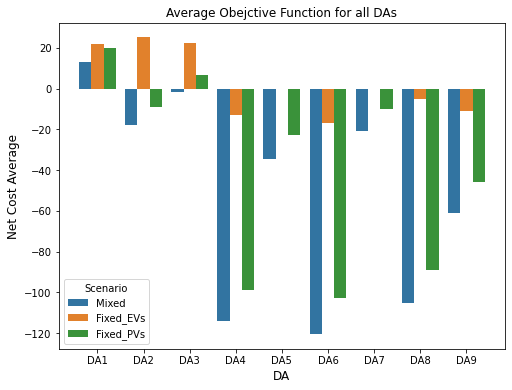

In [12]:
count=0
DA=[]
Scenario =[] 
Obj_Mean =[]

last_iter = 50

for df in df_all:
    df = df[-last_iter:]
    for X in zip(df.mean().index, df.mean()):
        DA.append(X[0])
        Scenario.append(data_order[count])
        Obj_Mean.append(X[1])
    count+=1   
df_compare = pd.DataFrame({'Scenario':Scenario, 'DA':DA, 'Mean':Obj_Mean,})

#******************************************************************************
#***************** Plot Data **************************************************

fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(data= df_compare, x='DA',y='Mean' ,hue='Scenario', ax=ax);

ax.set_title('Average Obejctive Function for all DAs', fontsize=12)
ax.set_xlabel('DA',fontsize=12);
ax.set_ylabel('Net Cost Average',fontsize=12);

ax.plot()

ax.set_rasterized(True)
#fig.savefig("Figures_Objective/Average_objective_function_ALL_Scenarios.png", bbox_inches= 'tight', dpi=200)

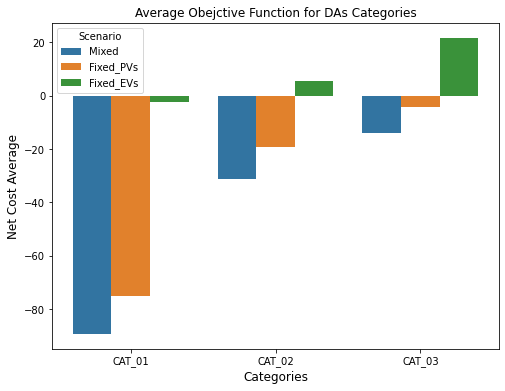

In [14]:
# Plot Based On Category
DAs_dict = dict()
for i in range(1,10):
    if i % 2 == 0:
        DAs_dict['DA'+str(i)] = 'CAT_01'
    elif i % 3 == 0:
        DAs_dict['DA'+str(i)] = 'CAT_02'
    else:
        DAs_dict['DA'+str(i)] = 'CAT_03'


for key, value in DAs_dict.items():
    df_compare.loc[df_compare['DA'] == key, 'DA'] = value

#****************************************
#********** Take Mean For Categories ****
order = ['Mixed', 'Fixed_PVs', 'Fixed_EVs']

df_compare = df_compare.groupby(['DA','Scenario']).mean().reset_index()


fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(1,1,1)

sns.barplot(data= df_compare, x='DA',y='Mean' ,hue='Scenario', hue_order=order, ax=ax);

ax.set_title('Average Obejctive Function for DAs Categories', fontsize=12)
ax.set_xlabel('Categories',fontsize=12);
ax.set_ylabel('Net Cost Average',fontsize=12);

ax.plot()

ax.set_rasterized(True)
#fig.savefig("Figures_Objective/Average_objective_function_ALL_Categories.png", bbox_inches= 'tight', dpi=200)

## Plot them side by side

C:\Users\alire\AppData\Local\Temp/ipykernel_11052/2025748611.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  for X in zip(df.mean().index, df.mean()):


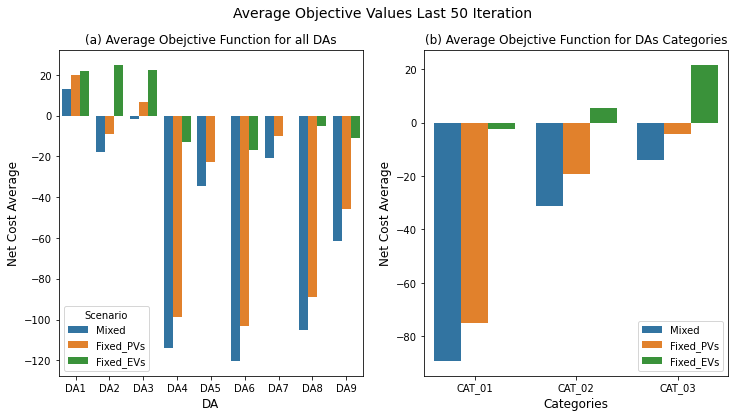

In [16]:
#******************************************************************************
#***************** Plot Based on each da and scenario   ***********************
count=0
DA=[]
Scenario =[] 
Obj_Mean =[]

last_iter = 50

for df in df_all:
    df = df[-last_iter:]
    for X in zip(df.mean().index, df.mean()):
        DA.append(X[0])
        Scenario.append(data_order[count])
        Obj_Mean.append(X[1])
    count+=1   
df_compare = pd.DataFrame({'Scenario':Scenario, 'DA':DA, 'Mean':Obj_Mean,})

#******************************************************************************
#***************** Plot Data **************************************************
fig, axes = plt.subplots(1, 2, figsize=(12, 6))


order = ['Mixed', 'Fixed_PVs', 'Fixed_EVs']

fig.suptitle('Average Objective Values Last %d Iteration'%(last_iter),fontsize=14)


sns.barplot(data= df_compare, x='DA',y='Mean' ,hue='Scenario', hue_order=order, ax=axes[0]);

axes[0].set_title('(a) Average Obejctive Function for all DAs', fontsize=12)
axes[0].set_xlabel('DA',fontsize=12);
axes[0].set_ylabel('Net Cost Average',fontsize=12);


#******************************************************************************
#***************** Plot Based on Categories and scenarios  ********************

# Plot Based On Category
DAs_dict = dict()
for i in range(1,10):
    if i % 2 == 0:
        DAs_dict['DA'+str(i)] = 'CAT_01'
    elif i % 3 == 0:
        DAs_dict['DA'+str(i)] = 'CAT_02'
    else:
        DAs_dict['DA'+str(i)] = 'CAT_03'


for key, value in DAs_dict.items():
    df_compare.loc[df_compare['DA'] == key, 'DA'] = value

#****************************************
#********** Take Mean For Categories ****

df_compare = df_compare.groupby(['DA','Scenario']).mean().reset_index()


sns.barplot(data= df_compare, x='DA',y='Mean' ,hue='Scenario', hue_order=order, ax=axes[1]);

axes[1].set_title('(b) Average Obejctive Function for DAs Categories', fontsize=12)
axes[1].set_xlabel('Categories',fontsize=12);
axes[1].set_ylabel('Net Cost Average',fontsize=12);
axes[1].legend(loc='lower right')

axes[0].set_rasterized(True)
axes[1].set_rasterized(True)

#******************************************************************************
#***************** Plot Data **************************************************

# handles, labels = plt.gca().get_legend_handles_labels()
# order = [0,1,2]
# plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order])



plt.show()
fig.set_rasterized(True)
fig.savefig("Figures_Objective/Average_Objective_Last_50_Iterations.png", bbox_inches= 'tight', dpi=300)